# **Responsi 2**: Fetal Health, GA + MLP (SKLEARN & TENSORFLOW) Implementation
---
##### Oleh : Nasmah Nur Amiroh (5200411196)


# **Pendahuluan**

Pada reponsi kali ini, topik yang dibahas ialah mengenai `kesehatan ` yang di buat untuk mengklasifikasikan kondisi kesehatan janin dengan 3 (tiga) kelas, yaitu:
1. Normal
2. Suspect
3. Pathological

Data fetal health ini merupakan salah satu bentuk data yang digunakan untuk mengukur angka kematian anak. Pengurangan angka kematian anak tercermin dalam beberapa Tujuan Pembangunan Berkelanjutan PBB dan merupakan indikator utama kemajuan manusia.

PBB mengharapkan bahwa pada tahun 2030, negara-negara mengakhiri kematian bayi baru lahir dan anak-anak di bawah usia 5 tahun yang dapat dicegah, dengan semua negara bertujuan untuk mengurangi angka kematian di bawah 5 hingga setidaknya 25 per 1.000 kelahiran hidup.

Sehubungan dengan apa yang telah disebutkan di atas, Cardiotocograms (CTGs) adalah pilihan yang sederhana dan terjangkau untuk menilai kesehatan janin, memungkinkan profesional kesehatan untuk mengambil tindakan untuk mencegah kematian anak dan ibu. Peralatan itu sendiri bekerja dengan mengirimkan pulsa ultrasound dan membaca responsnya, sehingga menjelaskan detak jantung janin (FHR), gerakan janin, kontraksi rahim, dan banyak lagi.

#A. IMPORT LIBRARY
Pada bagian ini, merupakan bagain yang melakukan proses importing packages library yang dibutuhkan untuk melakukan proses preprocessing hingga ploting hasil akurasi serta pembutan model yang akan digunakan dalam proses ini yaitu Genetic Algorithm dan MLP dengan Sklearn dan Tensorflow. 

In [ ]:
#data process library packages
import pandas as pd
pd.options.display.float_format = '{:.3f}'.format #untuk mengabaikan notasi scientific 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import random
import pickle
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, PolynomialFeatures, Binarizer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix, auc
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC, LinearSVC
from sklearn.feature_selection import SelectPercentile
#from tpot import TPOTClassifier
#from tpot.export_utils import set_param_recursive
import xgboost
#import eli5
%matplotlib inline

#b. DATA UNDERSTANDING 
Merupakan proses yang digunakan untuk mengetahui isi dari data yang akan digunakan dan diolah.



---


Pada proses di bawah ini, merupakan proses untuk membaca data yaitu data kesehatan janin yang datanya dalam bentuk numerik diekstensikan ke dalam bentuk .csv. Pada pembacaan data ini, menggunkan package library dari pandas yang berfungsi untuk membaca data baik dalam bentuk .csv maupun .xlsx yaitu pd.read_()

In [ ]:
data = pd.read_csv("fetal_health.csv")
data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.000,0.000,0.000,0.000,0.000,0.000,0.000,73.000,0.500,43.000,...,62.000,126.000,2.000,0.000,120.000,137.000,121.000,73.000,1.000,2.000
1,132.000,0.006,0.000,0.006,0.003,0.000,0.000,17.000,2.100,0.000,...,68.000,198.000,6.000,1.000,141.000,136.000,140.000,12.000,0.000,1.000
2,133.000,0.003,0.000,0.008,0.003,0.000,0.000,16.000,2.100,0.000,...,68.000,198.000,5.000,1.000,141.000,135.000,138.000,13.000,0.000,1.000
3,134.000,0.003,0.000,0.008,0.003,0.000,0.000,16.000,2.400,0.000,...,53.000,170.000,11.000,0.000,137.000,134.000,137.000,13.000,1.000,1.000
4,132.000,0.007,0.000,0.008,0.000,0.000,0.000,16.000,2.400,0.000,...,53.000,170.000,9.000,0.000,137.000,136.000,138.000,11.000,1.000,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000,0.000,0.000,0.007,0.000,0.000,0.000,79.000,0.200,25.000,...,137.000,177.000,4.000,0.000,153.000,150.000,152.000,2.000,0.000,2.000
2122,140.000,0.001,0.000,0.007,0.000,0.000,0.000,78.000,0.400,22.000,...,103.000,169.000,6.000,0.000,152.000,148.000,151.000,3.000,1.000,2.000
2123,140.000,0.001,0.000,0.007,0.000,0.000,0.000,79.000,0.400,20.000,...,103.000,170.000,5.000,0.000,153.000,148.000,152.000,4.000,1.000,2.000
2124,140.000,0.001,0.000,0.006,0.000,0.000,0.000,78.000,0.400,27.000,...,103.000,169.000,6.000,0.000,152.000,147.000,151.000,4.000,1.000,2.000


---
Kemudian, proses selanjutnya adalah mengetahui isi data dengan fungsi dataframe dari pandas yaitu info(). Proses ini digunakan untuk mengetahui informasi yang terkandung di dalam data. 


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

---
Lalu, pada langkah selanjutnya yanga ada di bawah ini, menampilkan string dari baris yang ada di dalam data dengan fungsi dataframe dari pandas yaitu head().  


In [ ]:
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.000,0.000,0.000,0.000,0.000,0.000,0.000,73.000,0.500,43.000,...,62.000,126.000,2.000,0.000,120.000,137.000,121.000,73.000,1.000,2.000
1,132.000,0.006,0.000,0.006,0.003,0.000,0.000,17.000,2.100,0.000,...,68.000,198.000,6.000,1.000,141.000,136.000,140.000,12.000,0.000,1.000
2,133.000,0.003,0.000,0.008,0.003,0.000,0.000,16.000,2.100,0.000,...,68.000,198.000,5.000,1.000,141.000,135.000,138.000,13.000,0.000,1.000
3,134.000,0.003,0.000,0.008,0.003,0.000,0.000,16.000,2.400,0.000,...,53.000,170.000,11.000,0.000,137.000,134.000,137.000,13.000,1.000,1.000
4,132.000,0.007,0.000,0.008,0.000,0.000,0.000,16.000,2.400,0.000,...,53.000,170.000,9.000,0.000,137.000,136.000,138.000,11.000,1.000,1.000


---
Untuk melihat bentuk data yang sudah ada, maka digunakan fungsi .shape() dari fungsi yang disediakan oleh pandas. Disini akan mengetahui bentuk data bagaimana, seperti di bawah ini datanya terdiri dari 2126 baris dengan 22 kolom. 

In [ ]:
data.shape

(2126, 22)

---
Selanjutnya, data dilihat deskripsinya dengan fungsi dataframe pandas yaitu .decribe(). Describe digunakan untuk mendeskripsikan isi dari data yang digunakan yaitu fetal health. Pada proses ini data akan diketahui jumlahnya dari perkolom, standar deviasinya, rata-rata, nilai max, serta minimalnya. 


In [ ]:
data.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,...,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000
mean,133.304,0.003,0.009,0.004,0.002,0.000,0.000,46.990,1.333,9.847,...,93.579,164.025,4.068,0.324,137.452,134.611,138.090,18.808,0.320,1.304
std,9.841,0.004,0.047,0.003,0.003,0.000,0.001,17.193,0.883,18.397,...,29.560,17.944,2.949,0.706,16.381,15.594,14.467,28.978,0.611,0.614
min,106.000,0.000,0.000,0.000,0.000,0.000,0.000,12.000,0.200,0.000,...,50.000,122.000,0.000,0.000,60.000,73.000,77.000,0.000,-1.000,1.000
25%,126.000,0.000,0.000,0.002,0.000,0.000,0.000,32.000,0.700,0.000,...,67.000,152.000,2.000,0.000,129.000,125.000,129.000,2.000,0.000,1.000
50%,133.000,0.002,0.000,0.004,0.000,0.000,0.000,49.000,1.200,0.000,...,93.000,162.000,3.000,0.000,139.000,136.000,139.000,7.000,0.000,1.000
75%,140.000,0.006,0.003,0.007,0.003,0.000,0.000,61.000,1.700,11.000,...,120.000,174.000,6.000,0.000,148.000,145.000,148.000,24.000,1.000,1.000
max,160.000,0.019,0.481,0.015,0.015,0.001,0.005,87.000,7.000,91.000,...,159.000,238.000,18.000,10.000,187.000,182.000,186.000,269.000,1.000,3.000


---
Langkah selanjutnya adalah mengganti nama atau rename beberapa kolom yang penting untuk mmepermudahkan pekerjaaan dengan data selajutnya. Rename kolom menggunakan fungsi rename yang ada pada dataframe function.


In [ ]:
# renaming baseline value column to make it easier to work with
data = data.rename(columns = {'baseline value':'baseline_value', 'prolongued_decelerations': 'prolonged_decelerations'})
data.columns

Index(['baseline_value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolonged_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

---
Langkah selanjutnya adalah dengan mengevaluasi nilai dari data yang ada serta melihat akeselerasi data dengn fungsi yang sudah ada. Pada langkah ini akselerasi bisa didapatkan dengan formula (acceleration = (finalVelocity - initialVelocity) / time.). 

In [ ]:
# getting value counts for fetal accelerations column
data.accelerations.value_counts()

0.000    894
0.003    161
0.002    160
0.001    143
0.004    117
0.006    112
0.005    110
0.008    103
0.007     91
0.009     60
0.010     50
0.011     36
0.012     24
0.013     22
0.014     20
0.015      9
0.016      7
0.017      4
0.018      2
0.019      1
Name: accelerations, dtype: int64

#C. DATA PREPARATION 
Langkah-langkah untuk mempersiapkan data sebelum masuk ke dalam pemodelan data.

---
Pada langkah di bawah ini dilakukan plotting dari hasil perhitungan akselerasi pada proses sebelumnya. Proses ini menggunakan package dari seaborn untuk melakukan plotting.

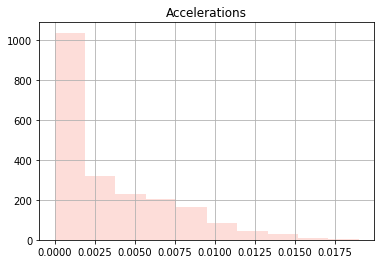

In [ ]:
# plotting acceleration frequencies
sns.set_palette(palette='RdPu')
data.accelerations.hist()
plt.title('Accelerations');

---
Menghitung value dari kolom fetal movement.

In [ ]:
# getting value counts for fetal movement column
data.fetal_movement.value_counts()

0.000    1311
0.001     164
0.002     112
0.003      88
0.004      49
         ... 
0.079       1
0.109       1
0.103       1
0.031       1
0.099       1
Name: fetal_movement, Length: 102, dtype: int64

---
Pada proses di bawah ini dilakukan ploting histogram pada kolom data fetal movement.

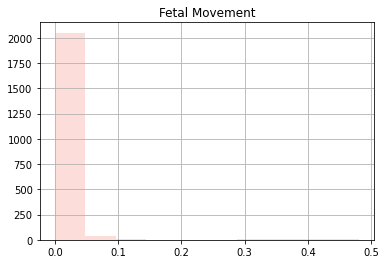

In [ ]:
# plotting fetal movement frequencies
data.fetal_movement.hist()
plt.title('Fetal Movement');

---
Kemudian, proses mempersiapkan data selanjutnya adlah dengan menghitung value dari kolom data severe declaration. Hal ini digunakan untuk memastikan bahwasannya isi dari data yang ada pada tiap kolom di data fetal health csv sama.

In [ ]:
data.severe_decelerations.value_counts()

0.000    2119
0.001       7
Name: severe_decelerations, dtype: int64

Kolom ini adalah ukuran persentase waktu dengan variabilitas jangka pendek yang abnormal. Menurut American Academy of Family Physicians (AAFP.org), variabilitas jangka pendek detak jantung janin didefinisikan sebagai "osilasi FHR di sekitar garis dasar dalam amplitudo 5 hingga 10 bpm." Dengan kata lain, itu adalah normal dan diharapkan memiliki beberapa variabilitas detak jantung janin di sekitar garis dasar. Namun, kolom ini adalah ukuran dari persentase waktu bahwa variabilitas abnormal diamati. Mempertimbangkan bahwa sebagian besar hasil kesehatan janin normal, saya merasa itu mengejutkan
ada beberapa catatan dengan persentase abnormal variabilitas jangka pendek yang tinggi.

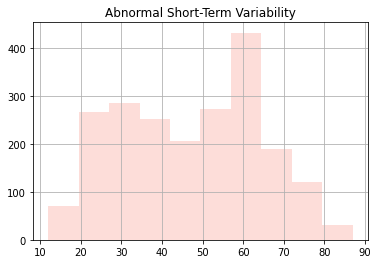

In [ ]:
data.abnormal_short_term_variability.hist()
plt.title('Abnormal Short-Term Variability');

---
Kemudian, melakukan proses ploting histogram untuk kolom histogram sehingga mengetahui isi dari data yang mana berjumalah sama sebanyak 2126 dengan data keseluruhan. Hal tersebut berarti nilai dari kolom histogram width tidak ada yang missing. 

In [ ]:
data.histogram_width.describe()

count   2126.000
mean      70.446
std       38.956
min        3.000
25%       37.000
50%       67.500
75%      100.000
max      180.000
Name: histogram_width, dtype: float64

---
Kemudian melihat korelasi antar data dengan firutr heatmap. Pada fitur ini yang menunjukkan korelasi terkuat dengan kesehatan janin adalah deselerasi berkepanjangan, dengan korelasi 0,485. Ada korelasi sedang
juga diamati antara kesehatan janin dan variabilitas jangka pendek abnormal, serta kesehatan janin dan persentase waktu dengan jangka panjang abnormal
variabilitas.

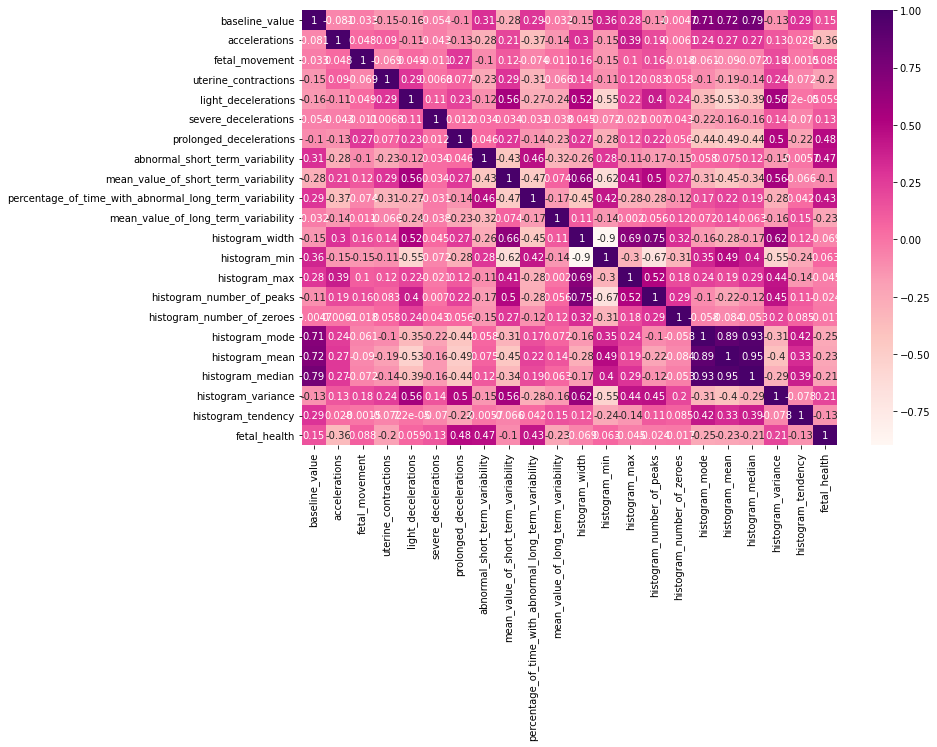

In [ ]:
# generate heatmap to display correlations in data
corr = data.corr()
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="RdPu");

---
Lalu di bawah ini dilakukan ploting dengan lineplot function di seaborn package. Lineplot ini dengan jelas menunjukkan hubungan antara deklarasi berkepanjangan denyut jantung janin dan hasil kesehatan janin. Jumlah waktu yang lebih lama diamati dengan deklarasi yang berkepanjangan, ditunjukkan juga semakin berisiko hasil kesehatannya.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Prolonged Decelerations and Fetal Health Outcomes')

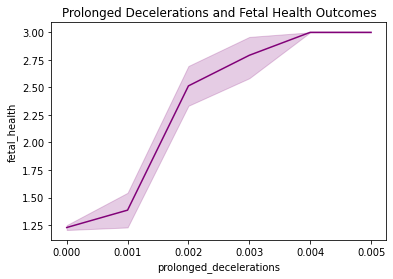

In [ ]:
sns.set_palette(palette='RdPu_r')
sns.lineplot('prolonged_decelerations','fetal_health', data=data, alpha=1.0)
plt.title('Prolonged Decelerations and Fetal Health Outcomes')
#plt.savefig('fig1.png');

---
Pada proses dibawah ini dilakukan plotting untuk data baseline fetal health rate distribution yang mana hasilnya menunjukkan sebagian besar nilai dasar untuk detak jantung janin adalah 0,06.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


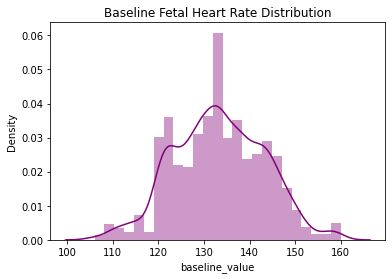

In [ ]:
sns.set_palette(palette='RdPu_r')
sns.distplot(data['baseline_value'])
plt.title('Baseline Fetal Heart Rate Distribution');

---
Lalu, proses di bawah ini merupakan proses plotting dari beberapa data baseline yang ada di dalam data fetal health. Hasil dari proses ini yaitu tidak adanya hubungan yang jelas antara denyut jantung janin awal dan hasil kesehatan janin.

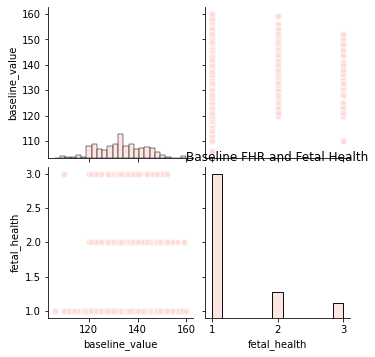

In [ ]:
sns.set_palette(palette='RdPu')
sns.pairplot(data[['baseline_value', 'fetal_health']])
plt.title('Baseline FHR and Fetal Health');

---
Lalu, proses selanjutnya adalah dengan melakukan indexing kolom yang ada dalam data fetal health.

In [ ]:
data.columns

Index(['baseline_value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolonged_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

---
Pada proses di bawah ini merupakan pengidentifikasian kolom yang ada terdapat nama histogram di dalamnya sehingga diklasi

In [ ]:
histogram_columns = ['histogram_width',
 'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
 'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
 'histogram_median', 'histogram_variance', 'histogram_tendency']

---
Banyak fitur dalam kumpulan data ini berkaitan dengan histogram aktual yang dicetak selama durasi CTG. Mereka tidak terlalu intuitif,
dan tampaknya pentingnya pengukuran histogram CTG agak ambigu. Tapi sebelum saya menyingkirkan kolom-kolom ini, saya penasaran
bagaimana pengukuran ini akan berdampak pada prediksi hasil kesehatan janin.

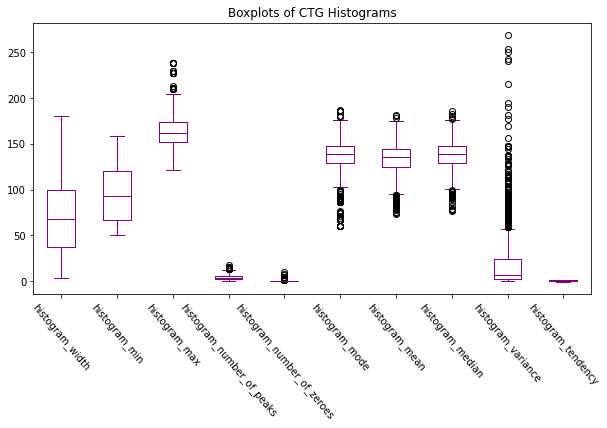

In [ ]:
data[histogram_columns].plot(kind='box',grid=False, color='Purple', figsize=(10,5));
plt.xticks(rotation=(-50))
plt.title('Boxplots of CTG Histograms');

#c. Data Preparation

---
Pada proses dibawah ini merupajan proses yang digunakan untuk melakukan droping kolom fetal health

In [ ]:
X = data.drop('fetal_health',axis=1)
y = data['fetal_health']

---
Checking untuk melakukan pengecekan versi dari sklearn

In [ ]:
import sklearn
print(sklearn.__version__)

1.0.2


---
Pada proses di bawah ini dilakukan imputasi data kosong yang dilakukan dengan proses KNN yaitu mengambil nilai terdekat.

In [ ]:
#melakukan penggantian data kosong dengan penggantian berbasis jarak 
imputer = KNNImputer(n_neighbors=5)
X = pd.DataFrame(imputer.fit_transform(X),columns=X.columns)

---
Melakukan pengecekan isi dan panjang data X dan Y.

In [ ]:
# Mengecek jumlah baris setelah dilakukan pembagian data latih dan data uji
print(len(X))
print(len(y))

2126
2126


---
Kumpulan data ini tidak memiliki nilai nol untuk ditangani.

In [ ]:
# checking for null values
data.isnull().sum()

baseline_value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolonged_decelerations                                   0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

---
Menghitung data fetal health dengan fungsi valule counts. 

In [ ]:
# checking value counts for target variable
data.fetal_health.value_counts()

1.000    1655
2.000     295
3.000     176
Name: fetal_health, dtype: int64

---
Melakukan proses plotting history yang dilakukan dengan menggambarkan melalui histogram yang mana proses ini memberikan gambaran hasil bahwasannya nilai 1 atau normal paling banyak. 

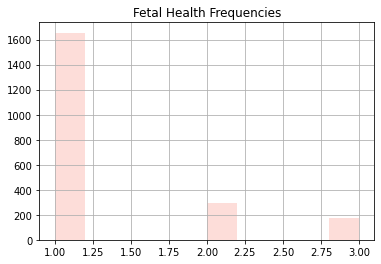

In [ ]:
# plotting target variable frequencies
data.fetal_health.hist()
plt.title('Fetal Health Frequencies');

#Feature Engineering
Kelas sasarannya, kesehatan janin, sangat tidak seimbang. Mayoritas hasil kesehatan janin yang diamati dalam kumpulan data ini adalah 1,00, yang merupakan sebutannya
untuk kesehatan janin Normal. Kelas dengan frekuensi terbanyak kedua adalah kelas kesehatan janin 2.00 atau Suspek. Kelas dengan frekuensi terendah dalam hal ini
dataset adalah 3.00 atau kesehatan janin Patologis.
Untuk membuat data sedikit lebih mudah untuk dikerjakan dan dipahami, dan mengubahnya menjadi masalah klasifikasi biner, saya menggabungkan kelas 2.00 dan 3.00 dari
Kesehatan janin yang dicurigai dan patologis masuk dalam kategori yang disebut Berisiko. Saya menetapkan semua nilai 1,00 sebagai Normal.

In [ ]:
# engineering new categorical target column for Normal and At Risk fetal health
data.loc[data['fetal_health']==1.000, 'fh_outcome'] = 'Normal'
data.loc[data['fetal_health']==2.000, 'fh_outcome'] = 'At Risk'
data.loc[data['fetal_health']==3.000, 'fh_outcome'] = 'At Risk'

---
Pada proses di bawah ini melakukan penghapusan kolom fetal health.

In [ ]:
data = data.drop(columns='fetal_health', axis=1)

---
Pada proses di bawah ini dilakukan proses pemberian nama sring pada tiap tiap kolom yang ada pada data fetal heath.

In [ ]:
data.head()

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolonged_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fh_outcome
0,120.000,0.000,0.000,0.000,0.000,0.000,0.000,73.000,0.500,43.000,...,62.000,126.000,2.000,0.000,120.000,137.000,121.000,73.000,1.000,At Risk
1,132.000,0.006,0.000,0.006,0.003,0.000,0.000,17.000,2.100,0.000,...,68.000,198.000,6.000,1.000,141.000,136.000,140.000,12.000,0.000,Normal
2,133.000,0.003,0.000,0.008,0.003,0.000,0.000,16.000,2.100,0.000,...,68.000,198.000,5.000,1.000,141.000,135.000,138.000,13.000,0.000,Normal
3,134.000,0.003,0.000,0.008,0.003,0.000,0.000,16.000,2.400,0.000,...,53.000,170.000,11.000,0.000,137.000,134.000,137.000,13.000,1.000,Normal
4,132.000,0.007,0.000,0.008,0.000,0.000,0.000,16.000,2.400,0.000,...,53.000,170.000,9.000,0.000,137.000,136.000,138.000,11.000,1.000,Normal


---
Proses di bawah ini dilakukan proses penghitungan value data normal dan tidak normal yang sudah digabungkan sebelumnya.

In [ ]:
data.fh_outcome.value_counts()

Normal     1655
At Risk     471
Name: fh_outcome, dtype: int64

---
Pada proses ini hasil dari plotting masih sangat tidak seimbang, tetapi agak lebih mudah sebagai masalah klasifikasi biner. Dan jika kita bekerja untuk memaksimalkan kesehatan janin, maka setiap anggota dari kategori berisiko harus diperlakukan dengan keseriusan dan urgensi.

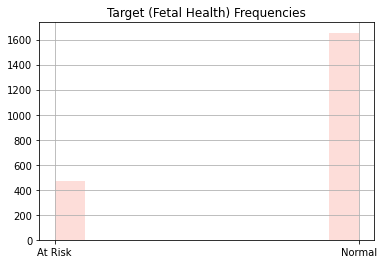

In [ ]:
# plotting target frequencies
data.fh_outcome.hist()
plt.title('Target (Fetal Health) Frequencies');

#Encoding


Setiap fitur dalam data CTG sudah numerik (float) sehingga tidak perlu banyak pengkodean, selain variabel target. Dengan makhluk itu
berkata, saya memilih untuk menangani pengkodean variabel target menggunakan pd.get_dummies.

In [ ]:
data.dtypes

baseline_value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolonged_decelerations                                   float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

---
Melakukan proses dummies data yang sudah dilakukan proses preparation.

In [ ]:
data = pd.get_dummies(data, columns=['fh_outcome'])
data.head()

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolonged_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fh_outcome_At Risk,fh_outcome_Normal
0,120.000,0.000,0.000,0.000,0.000,0.000,0.000,73.000,0.500,43.000,...,126.000,2.000,0.000,120.000,137.000,121.000,73.000,1.000,1,0
1,132.000,0.006,0.000,0.006,0.003,0.000,0.000,17.000,2.100,0.000,...,198.000,6.000,1.000,141.000,136.000,140.000,12.000,0.000,0,1
2,133.000,0.003,0.000,0.008,0.003,0.000,0.000,16.000,2.100,0.000,...,198.000,5.000,1.000,141.000,135.000,138.000,13.000,0.000,0,1
3,134.000,0.003,0.000,0.008,0.003,0.000,0.000,16.000,2.400,0.000,...,170.000,11.000,0.000,137.000,134.000,137.000,13.000,1.000,0,1
4,132.000,0.007,0.000,0.008,0.000,0.000,0.000,16.000,2.400,0.000,...,170.000,9.000,0.000,137.000,136.000,138.000,11.000,1.000,0,1


In [ ]:
data = data.drop(columns=['fh_outcome_Normal'], axis=1)
data.head()

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolonged_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fh_outcome_At Risk
0,120.000,0.000,0.000,0.000,0.000,0.000,0.000,73.000,0.500,43.000,...,62.000,126.000,2.000,0.000,120.000,137.000,121.000,73.000,1.000,1
1,132.000,0.006,0.000,0.006,0.003,0.000,0.000,17.000,2.100,0.000,...,68.000,198.000,6.000,1.000,141.000,136.000,140.000,12.000,0.000,0
2,133.000,0.003,0.000,0.008,0.003,0.000,0.000,16.000,2.100,0.000,...,68.000,198.000,5.000,1.000,141.000,135.000,138.000,13.000,0.000,0
3,134.000,0.003,0.000,0.008,0.003,0.000,0.000,16.000,2.400,0.000,...,53.000,170.000,11.000,0.000,137.000,134.000,137.000,13.000,1.000,0
4,132.000,0.007,0.000,0.008,0.000,0.000,0.000,16.000,2.400,0.000,...,53.000,170.000,9.000,0.000,137.000,136.000,138.000,11.000,1.000,0


In [ ]:
data['fh_outcome_At Risk'].value_counts()

0    1655
1     471
Name: fh_outcome_At Risk, dtype: int64

In [ ]:
data = data.rename(columns={'fh_outcome_At Risk':'target'})
data.target.value_counts()

0    1655
1     471
Name: target, dtype: int64

---
Pada proses di bawah ini, dilakukan plotting untuk target pada kolom di prologed declaration dan fetal health.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


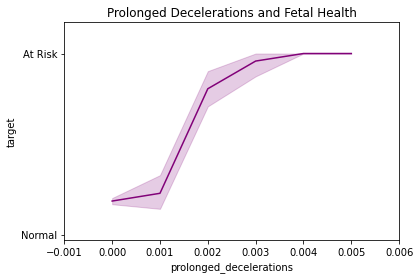

In [ ]:
sns.set_palette(palette='RdPu_r')
sns.lineplot('prolonged_decelerations','target', data=data, alpha=1.0)
y = [0,1]
labels = ['Normal', 'At Risk']
plt.yticks(y, labels)
plt.margins(0.2)
plt.title('Prolonged Decelerations and Fetal Health')
plt.show()

---
Proses di bawah ini merupakan hasil plotting yang menunjukkan bahwa terdapat hubungan yang terlihat antara deselerasi detak jantung janin yang berkepanjangan dan kesehatan janin.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


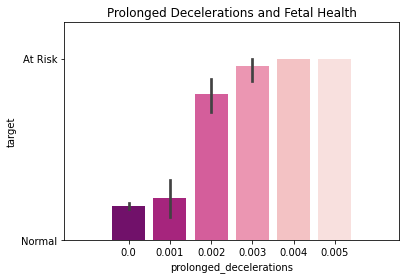

In [ ]:
sns.set_palette(palette='RdPu_r')
sns.barplot('prolonged_decelerations','target', data=data)
y = [0,1]
labels = ['Normal', 'At Risk']
plt.yticks(y, labels)
plt.margins(0.2)
plt.title('Prolonged Decelerations and Fetal Health')
plt.show()

Ada lebih banyak contoh tanpa deselerasi di kelas Normal, dan lebih banyak lagi contoh deselerasi yang lebih lama di kelas Beresiko.

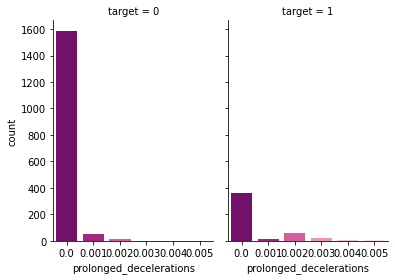

In [ ]:
g = sns.catplot(x="prolonged_decelerations", col="target",
 data=data, kind="count",
 height=4, aspect=0.7)
#plt.title('Prolonged Deceleration by Fetal Health Outcome', pad=50, loc='right');

---
Pada proses di bawah digambaraan dengan titik ungu muda mewakili kelas Berisiko dan titik ungu tua mewakili kelas Normal. Dari scatterplot tersebut terlihat bahwa poin dengan nilai lebih tinggi untuk persentase waktu dengan variabilitas jangka pendek dan jangka panjang didominasi oleh kelas Berisiko, dengan hanya sedikit Normals dibumbui di sana.

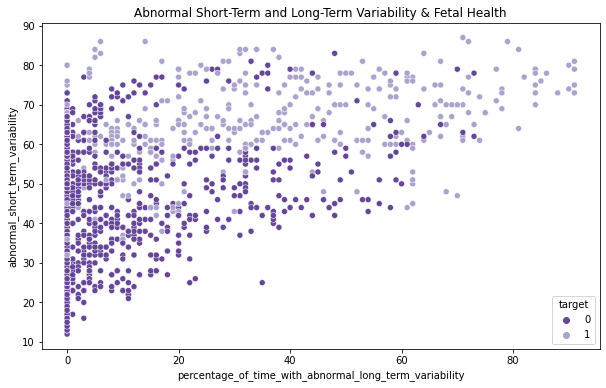

In [ ]:
# create scatter plot for samples from each class
sns.set_palette(palette='PuOr_r')
plt.figure(figsize=(10,6))
sns.scatterplot(x="percentage_of_time_with_abnormal_long_term_variability", y="abnormal_short_term_variability", hue='target', data=data)
plt.title('Abnormal Short-Term and Long-Term Variability & Fetal Health');

---
Pada proses di bawah ini dilakukan untuk membandingkan nilai FHR dasar dan nilai rata-rata variabilitas jangka pendek, tidak mudah untuk membedakan hubungan yang jelas antar kelas.

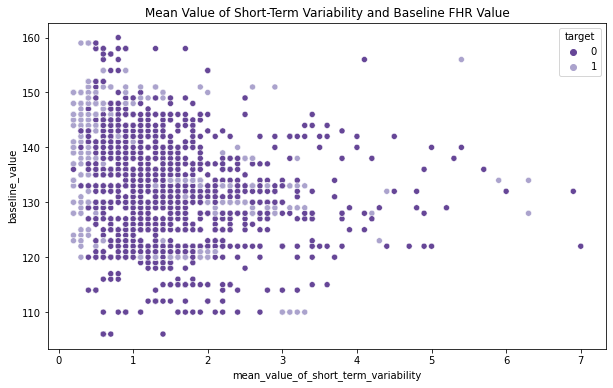

In [ ]:
# create scatter plot for samples from each class
sns.set_palette(palette='PuOr_r')
plt.figure(figsize=(10,6))
sns.scatterplot(x="mean_value_of_short_term_variability", y="baseline_value", hue='target', data=data)
plt.title('Mean Value of Short-Term Variability and Baseline FHR Value');

---
Proses ini merupakan suatu cara untuk membedakan polanya di sini. Perlu dicatat bahwa tidak ada cara yang jelas untuk membedakan kedua kelas berdasarkan fitur ini saja. sayasangat ingin tahu seberapa baik performa model pada fitur yang tersebar ini.

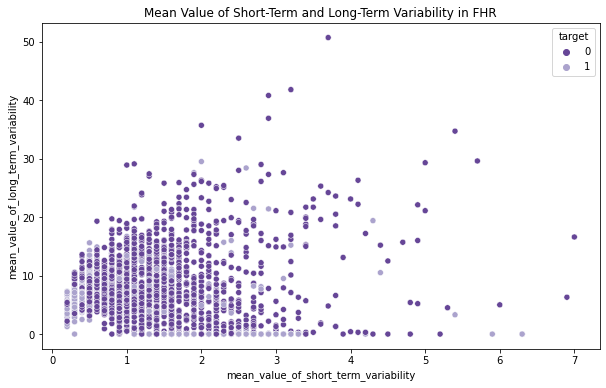

In [ ]:
# create scatter plot for samples from each class
sns.set_palette(palette='PuOr_r')
plt.figure(figsize=(10,6))
sns.scatterplot(x="mean_value_of_short_term_variability", y="mean_value_of_long_term_variability", hue='target', data=data)
plt.title('Mean Value of Short-Term and Long-Term Variability in FHR');

#D. ALGORITMA GENETIKA IMPLEMENTATION 

---
Proses di bawah ini merupakan proses pengimportan packages library yang akan digunakan untuk pemodelan sklearn dan tensorflow diproses selanjutnya. 

In [ ]:
#implementasi model GA

import numpy as np
import pandas as pd
from random import randint

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

---
Merupakan library yang akan digunakan untuk melakukan evaluasi model.

In [ ]:
#model evaluate

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score 

Pada, proses di bawah ini merupakan proses imprt packages library yang digunakan untuk split data.

In [ ]:
#split data
from sklearn.model_selection import train_test_split

---
Proses di bawah ini merupakan proses untuk mempersiapkan data yang akan digunakan untuk data fetal health yang mana di sini digunakan untuk melihat record data.

In [ ]:
#dataset preparing

data_bc = pd.read_csv("fetal_health.csv")
label_bc = data_bc["fetal_health"]
data_bc.drop(["fetal_health"],axis = 1,inplace = True)

print("Fetal Health Dataset:\n",data_bc.shape[0],"Records\n",data_bc.shape[1],"Features")

Fetal Health Dataset:
 2126 Records
 21 Features


---
Proses di bawah ini, meruapakan proses yang digunakan untuk melakukan split data yang akan digunkan, yang mana proses ini akan menghasilkan data training dan data testing.

In [ ]:
def split(df, label):
  X_tr, X_te, Y_tr, Y_te = train_test_split(df, label, test_size=0.25, random_state=42)
  return X_tr, X_te, Y_tr, Y_te

#e. Modeling

---
Proses di bawah ini merupakan proses import packages library yang digunakan untuk membuat dan mengevalusi model nantinya, seperti pemanggilan fungsi mlp bahkan hingga opitimizernya seperti adam dan rmsprop.

In [ ]:
#untuk pembuatan model 
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

#untuk evaluasi model 
from sklearn.metrics import confusion_matrix, classification_report 

from keras import models 
from keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizer import Adam, RMSProp

---
Proses di bawah ini merupakan proses untuk melakukan pemodelan MLP dengan solver Adam, eta sebesar 1e-5, hidden layer, dan randm state yang di definnisikan di dalam model MLP Classifier.

Kemudian mengidentifikasikan fungsi- fungsi yang digunakan untuk mendefinisikan populasi, fitness score, seleksi, pernikahan silang, mutasi, dan bahkan penginisialisasian fungsi untuk bisa membuat GA dari ketiga model yang mana dengan mengidentifikasikan skor terbaik serta model terbaik.  



In [ ]:
#MODELLING

sk_model = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(50, 50), random_state=42)

def initilization_of_population(size,n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat,dtype=np.bool)     
        chromosome[:int(0.3*n_feat)]=False             
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

def fitness_score_sklearn(population):
    scores = []
    for chromosome in population:
        sk_model.fit(X_train.iloc[:,chromosome],Y_train)         
        predictions = sk_model.predict(X_test.iloc[:,chromosome])
        scores.append(accuracy_score(Y_test,predictions))
    scores, population = np.array(scores), np.array(population) 
    inds = np.argsort(scores)                                    
    return list(scores[inds][::-1]), list(population[inds,:][::-1]) 

def fitness_score_keras_adam(population):
    scores = []
    for chromosome in population:
        iShape = X_train.iloc[:,chromosome].shape[1]
        kr_model1 = models.Sequential()
        kr_model1.add(layers.Dense(32, activation='relu', input_shape=(iShape,)))
        kr_model1.add(layers.Dense(128, activation='relu'))
        kr_model1.add(layers.Dense(256, activation='relu'))
        kr_model1.add(layers.Dense(1, activation='softmax'))

        kr_model1.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

        kr_model1.fit(X_train.iloc[:,chromosome],Y_train, epochs=50, batch_size=100, verbose=0)         
        predictions = kr_model1.predict(X_test.iloc[:,chromosome])
        predictions = (predictions > 0.5)
        scores.append(accuracy_score(Y_test,predictions))
    scores, population = np.array(scores), np.array(population) 
    inds = np.argsort(scores)                                    
    return list(scores[inds][::-1]), list(population[inds,:][::-1]) 

def fitness_score_keras_rmsprop(population):
    scores = []
    for chromosome in population:
        iShape = X_train.iloc[:,chromosome].shape[1]
        kr_model2 = models.Sequential()
        kr_model2.add(layers.Dense(32, activation='relu', input_shape=(iShape,)))
        kr_model2.add(layers.Dense(128, activation='relu'))
        kr_model2.add(layers.Dense(256, activation='relu'))
        kr_model2.add(layers.Dense(1, activation='softmax'))

        kr_model2.compile(optimizer='RMSprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

        kr_model2.fit(X_train.iloc[:,chromosome],Y_train, epochs=50, batch_size=100, verbose=1)         
        predictions = kr_model2.predict(X_test.iloc[:,chromosome])
        predictions = (predictions > 0.5)
        scores.append(accuracy_score(Y_test,predictions))
    scores, population = np.array(scores), np.array(population) 
    inds = np.argsort(scores)                                    
    return list(scores[inds][::-1]), list(population[inds,:][::-1]) 

def selection(pop_after_fit,n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen


def crossover(pop_after_sel):
    pop_nextgen = pop_after_sel
    for i in range(0,len(pop_after_sel),2):
        new_par = []
        child_1 , child_2 = pop_nextgen[i] , pop_nextgen[i+1]
        new_par = np.concatenate((child_1[:len(child_1)//2],child_2[len(child_1)//2:]))
        pop_nextgen.append(new_par)
    return pop_nextgen


def mutation(pop_after_cross,mutation_rate,n_feat):   
    mutation_range = int(mutation_rate*n_feat)
    pop_next_gen = []
    for n in range(0,len(pop_after_cross)):
        chromo = pop_after_cross[n]
        rand_posi = [] 
        for i in range(0,mutation_range):
            pos = randint(0,n_feat-1)
            rand_posi.append(pos)
        for j in rand_posi:
            chromo[j] = not chromo[j]  
        pop_next_gen.append(chromo)
    return pop_next_gen

def sk_gene(df,label,size,n_feat,n_parents,mutation_rate,n_gen,X_train,
                                   X_test, Y_train, Y_test):
    best_chromo= []
    best_score= []
    population_nextgen=initilization_of_population(size,n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score_sklearn(population_nextgen)
        print('Best score in generation',i+1,':',scores[:1])  #2
        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate,n_feat)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo,best_score

def kr1_gene(df,label,size,n_feat,n_parents,mutation_rate,n_gen,X_train,
                                   X_test, Y_train, Y_test):
    best_chromo= []
    best_score= []
    population_nextgen=initilization_of_population(size,n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score_keras_adam(population_nextgen)
        print('Best score in generation',i+1,':',scores[:1])  #2
        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate,n_feat)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo,best_score

def kr2_gene(df,label,size,n_feat,n_parents,mutation_rate,n_gen,X_train,
                                   X_test, Y_train, Y_test):
    best_chromo= []
    best_score= []
    population_nextgen=initilization_of_population(size,n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score_keras_rmsprop(population_nextgen)
        print('Best score in generation',i+1,':',scores[:1])  #2
        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate,n_feat)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo,best_score

#F. Evaluasi

---
Pada proses di bawah ini, merupakan proses evalusasi model sklearn untuk mlp yang mana hasilnya memiliki akurasi sebesar 90,78 pada genetik ke 5.

In [ ]:
#sklearn
X_train,X_test, Y_train, Y_test = split(data_bc,label_bc)
chromo_df_bc,score_bc=sk_gene(data_bc,label_bc,size=80,n_feat=data_bc.shape[1],n_parents=64,mutation_rate=0.20,n_gen=5,
                         X_train = X_train,X_test = X_test,Y_train = Y_train,Y_test = Y_test)

Best score in generation 1 : [0.9022556390977443]
Best score in generation 2 : [0.8966165413533834]
Best score in generation 3 : [0.9060150375939849]
Best score in generation 4 : [0.900375939849624]
Best score in generation 5 : [0.9078947368421053]


---
Lalu, pada proses di bawah ini dilakukan evaluasi model untuk model keras adam yang mana memiliki hasil akurasi sebesar 77,63.

In [ ]:
#keras adam
X_train,X_test, Y_train, Y_test = split(data_bc,label_bc)
chromo_df_bc,score_bc=kr1_gene(data_bc,label_bc,size=80,n_feat=data_bc.shape[1],n_parents=64,mutation_rate=0.20,n_gen=5,
                         X_train = X_train,X_test = X_test,Y_train = Y_train,Y_test = Y_test)

17/17 [==============================] - 0s 1ms/step
Best score in generation 1 : [0.7763157894736842]
17/17 [==============================] - 0s 1ms/step
Best score in generation 2 : [0.7763157894736842]
17/17 [==============================] - 0s 1ms/step
Best score in generation 3 : [0.7763157894736842]
17/17 [==============================] - 0s 1ms/step
Best score in generation 4 : [0.7763157894736842]
17/17 [==============================] - 0s 1ms/step
Best score in generation 5 : [0.7763157894736842]


---
Pada proses di bawah ini, merupakan pemodelan model ketiga yaitu keras dengan optimizer rmsprop yang memiliki hasil akurasi sebesar 77,6 yang hampir sama dengan model tensorflow adam.

In [ ]:
#keras rms prop
X_train,X_test, Y_train, Y_test = split(data_bc,label_bc)
chromo_df_bc,score_bc=kr2_gene(data_bc,label_bc,size=80,n_feat=data_bc.shape[1],n_parents=64,mutation_rate=0.20,n_gen=5,
                         X_train = X_train,X_test = X_test,Y_train = Y_train,Y_test = Y_test)

Streaming output truncated to the last 5000 lines.
16/16 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.7792
Epoch 27/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.7792
Epoch 28/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.7792
Epoch 29/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.7792
Epoch 30/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.7792
Epoch 31/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.7792
Epoch 32/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.7792
Epoch 33/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.7792
Epoch 34/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.7792
Epoch 35/50
16/16 [===============

#G. KESIMPULAN

---
Kesimpulannya, data cardiotocogram memberikan wawasan yang mudah diakses dan ditafsirkan tentang hasil kesehatan janin. Model ML mampu memprediksi jika janin dalam keadaan tertekan, menggunakan data CTG, dengan tingkat ingatan/sensitivitas yang tinggi. Dapat dilihat bahwasannya model yang terbaik pada kasus kali ini adalah model sklearn mlp adam dengan akurasi 90,78% pada gen ke 5. Pada proses ini pula, dapat dilihat kecepatan memproses data bahwasannya model tensorflow adam dan rmsprop semakin cepat mengeksekusi data dengan model maka semakin baik model yang dibentuk.